In [1]:
import nltk
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import pickle
import mgzip
from nltk.tokenize import sent_tokenize
from pandarallel import pandarallel
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from HanTa import HanoverTagger as ht
import string

#pandarallel.initialize(progress_bar=True)
tqdm.pandas()

# Data exploration for final thesis document

## Make wordcloud of the most common words in articles & frequency

In [2]:
# load command
with mgzip.open('../data/combined_news_pre.mgzip', 'rb') as handle:
    combined_news_pre = pickle.load(handle)

In [3]:
words = combined_news_pre['text_token']
allwords = []
for wordlist in words:
    allwords += wordlist

In [5]:
mostcommon = FreqDist(allwords).most_common(100)
new_mostcommon = []
for i, x in enumerate(mostcommon):
    new_mostcommon.append(mostcommon[i][0])

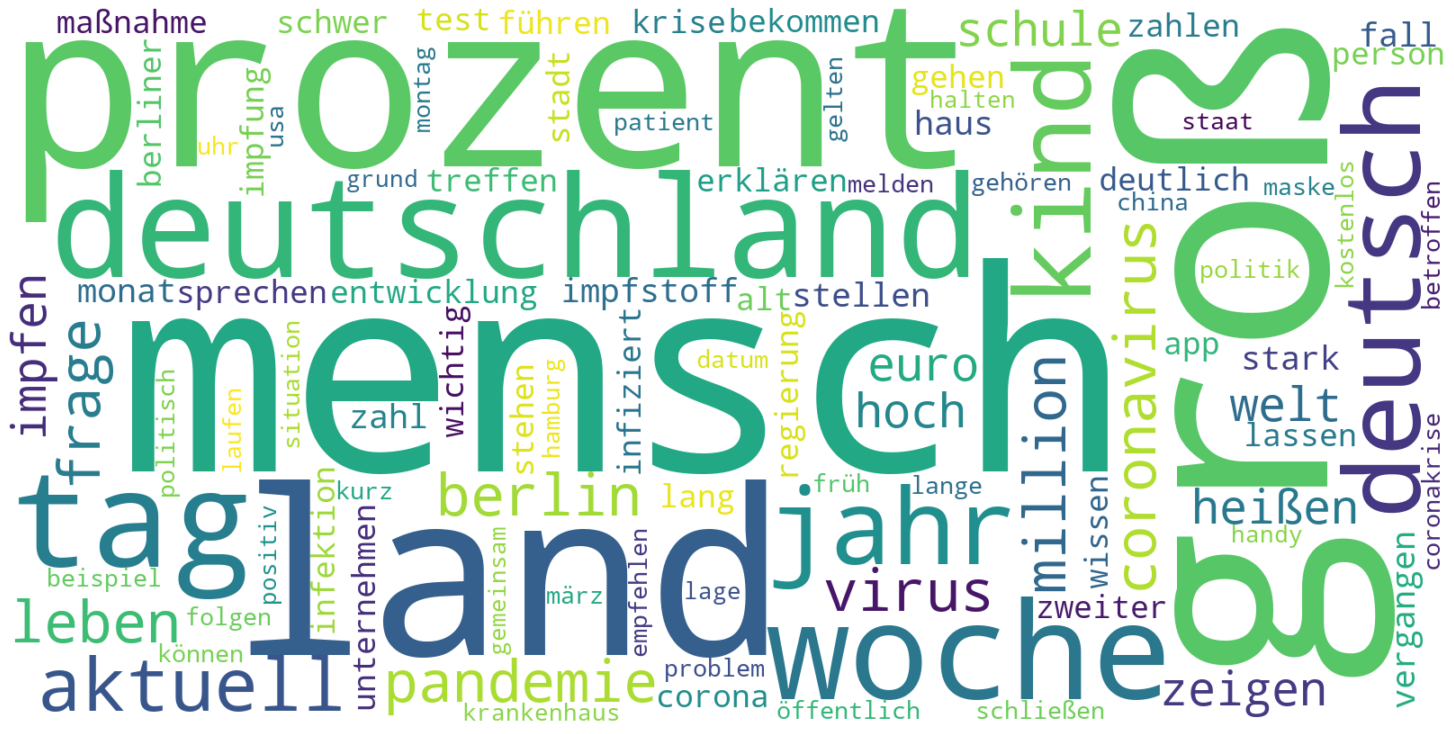

In [6]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(new_mostcommon))
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('../figures/eda_most_common_words.png')
plt.show()

In [4]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

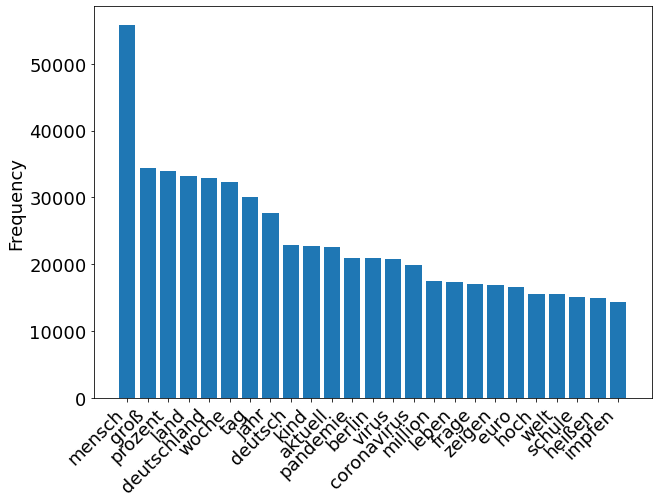

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x, y)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.gcf().subplots_adjust(bottom=0.20)
plt.rcParams.update({'font.size': 18})
plt.savefig('../figures/eda_25_common_words.png')

## Make wordcloud of the most common words in comments & frequency

In [8]:
with mgzip.open('../data/combined_comments_pre.mgzip', 'rb') as handle:
    combined_comments_pre = pickle.load(handle)

In [9]:
words = combined_comments_pre['tokens']
allwords = []
for wordlist in words:
    allwords += wordlist

In [10]:
mostcommon = FreqDist(allwords).most_common(100)

In [11]:
new_mostcommon = []
for i, x in enumerate(mostcommon):
    new_mostcommon.append(mostcommon[i][0])

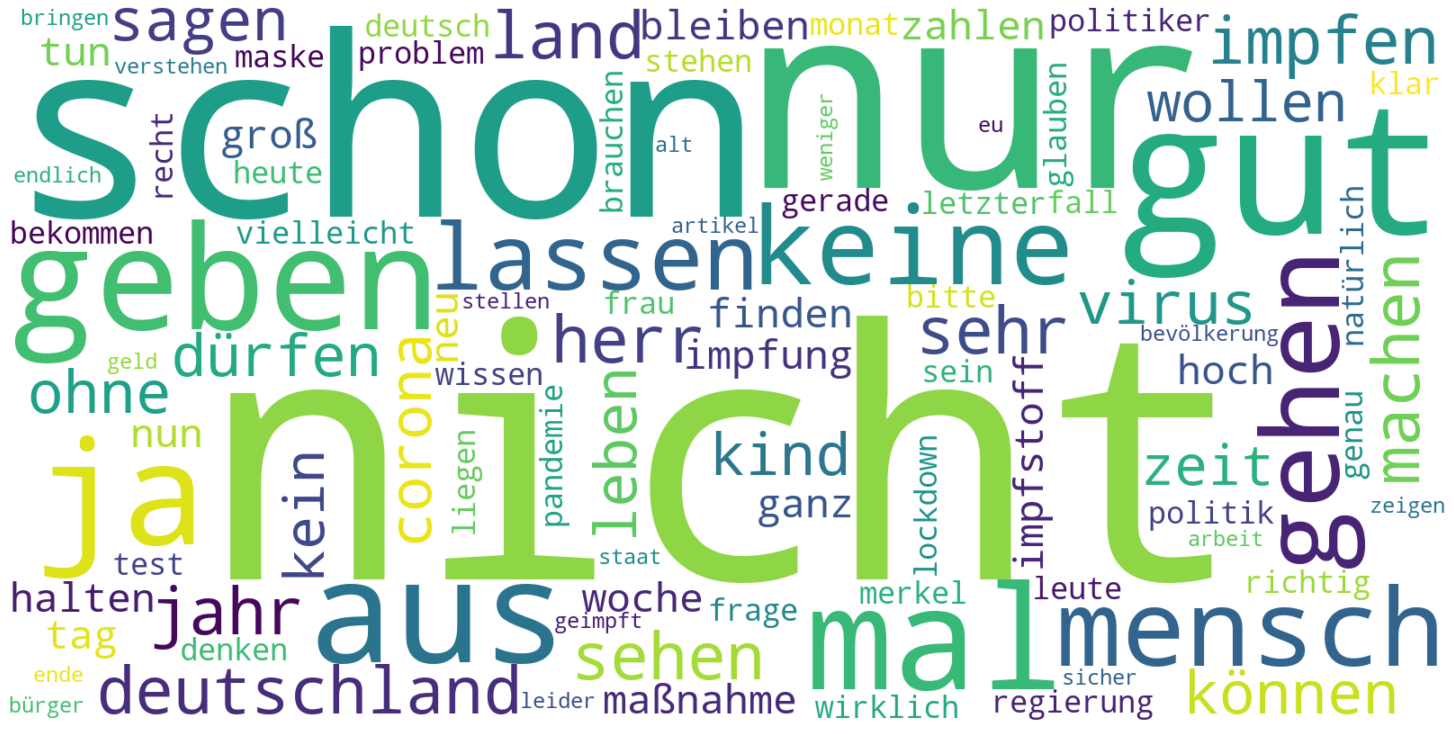

In [12]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(' '.join(new_mostcommon))
fig = plt.figure(figsize=(20,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('../figures/eda_most_common_words_comment.png')
plt.show()

In [10]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)

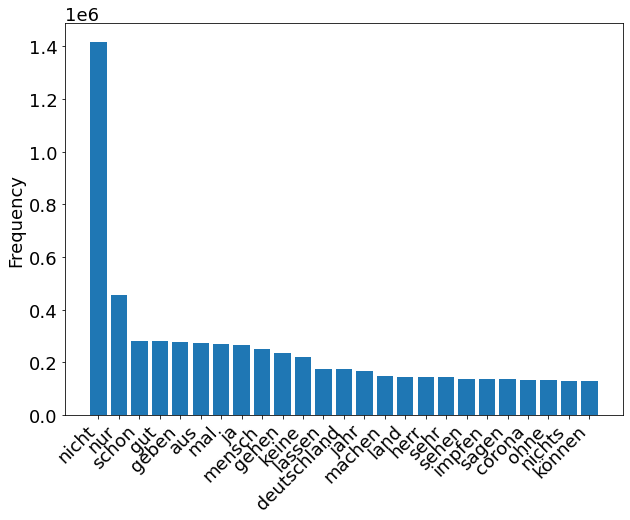

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x, y)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.gcf().subplots_adjust(bottom=0.20)
plt.rcParams.update({'font.size': 18})
plt.savefig('../figures/eda_25_common_words_comments.png')

## Hand annotation of test set

In [2]:
# load command
with mgzip.open('../data/combined_comments_pre.mgzip', 'rb') as handle:
    combined_comments_pre = pickle.load(handle)

In [6]:
test_data = combined_comments_pre.sample(1000, random_state=232)

In [14]:
test_data

,title,date,variable,value,newspaper,tokens
1076212,"Testen, Impfen, mehr Kontrolle – Spahns Plan f...",2021-03-11 11:53:00,Comment146,„Bettenauslastung auf Intensivstationen: Da di...,welt,"[bettenauslastung, intensivstation, anzahl, in..."
4124113,"""Alternativlos"" – Divi spricht sich offiziell ...",2021-11-25 11:47:00,Comment562,Man lasse sich seine Forderung nach der Impfpf...,welt,"[lassen, forderung, impfpflicht, zunge, zergeh..."
1552045,"""Wir impfen Deutschland zurück in die Freiheit""",2021-08-24 13:37:00,Comment211,„Wir impfen Deutschland zurück in die Freiheit...,welt,"[impfen, deutschland, freiheit, ganz, sicher, ..."
1313855,"Mehrheit der Deutschen für Testpflicht, aber g...",2020-06-08 18:00:00,Comment179,"Wer Geld für Urlaub in Risikogebieten hat, ka...",welt,"[geld, urlaub, risikogebiet, sicher, test, lei..."
53410,Wandergruppe löst Corona-Ausbruch in Baden-Wür...,2021-02-04 15:41:00,Comment4,"Nein, eine ""Hexenjagd"" darf es nicht geben, ab...",tagespiegel,"[nein, hexenjagd, dürfen, nicht, geben, verurt..."
...,...,...,...,...,...,...
2666334,Dramatische Unzufriedenheit mit Corona-Politik...,2021-02-12 18:02:00,Comment363,Wo finden Sie so viele die für eine härtere Ga...,welt,"[finden, hart, gangart, nicht, glauben]"
3564864,Merkel wirbt bei Familien um Geduld in Corona-...,2021-01-30 11:04:00,Comment486,"Ich verstehe es nur als absolute Chuzpe, dass ...",welt,"[verstehen, nur, absolut, chuzpe, frau, wagen,..."
11691107,Bundesregierung plant ab Herbst weitergehende ...,2021-03-08 20:30:00,Comment1595,"Die Schikanen überzeugen mich leider nicht, nm...",welt,"[schikanen, überzeugen, leider, nicht, nmch, i..."
266383,Die Reise im Flugzeug ist nur noch eine reine ...,2020-08-24 18:09:00,Comment36,Wir haben in den schwerer betroffenen Bundeslä...,welt,"[schwer, betroffen, bundesland, inzidenz, 15, ..."


In [5]:
from superintendent import ClassLabeller

In [30]:
widget = ClassLabeller(
    features=list(test_data['value']),
    options=[
        "positive",
        "neutral",
        "negative",
    ]
)

In [31]:
widget

ClassLabeller(children=(HBox(children=(FloatProgress(value=0.0, description='Progress:', max=1.0),)), Box(chil…

In [32]:
widget.new_labels

['negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'n

In [34]:
len(widget.new_labels)

1000

In [35]:
test_data['labels'] = widget.new_labels

In [37]:
#with mgzip.open("../data/test_data.mgzip", 'wb') as f:
#    pickle.dump(test_data, f)

In [2]:
# load command
with mgzip.open('../data/test_data.mgzip', 'rb') as handle:
    test = pickle.load(handle)